In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Samsung_Dataset.csv')

In [3]:
(data['Volume']==0).sum()

127

In [4]:
data = data[data.iloc[:, -1] != 0]

In [5]:
data.reset_index(inplace = True)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

index                 int64
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
data_pivot = data.pivot_table(index='Date', values=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], aggfunc='mean')
data_pivot.reset_index(inplace=True)
data_pivot.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2000-01-04,4449.709961,6110.0,6110.0,5660.0,6000.0,74195000
1,2000-01-05,4063.728760,5580.0,6060.0,5520.0,5800.0,74680000
2,2000-01-06,4092.859863,5620.0,5780.0,5580.0,5750.0,54390000
3,2000-01-07,4034.598877,5540.0,5670.0,5360.0,5560.0,40305000
4,2000-01-10,4202.098145,5770.0,5770.0,5580.0,5600.0,46880000


In [8]:
df = data_pivot

In [9]:
df['MA_20'] = df['Close'].rolling(window=20).mean()

In [10]:
df['MA_200'] = df['Close'].rolling(window=200).mean()

In [11]:
def RSI(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    ema_gain = gain.ewm(com=period - 1, adjust=False).mean()
    ema_loss = loss.ewm(com=period - 1, adjust=False).mean()
    RS = ema_gain / ema_loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df['RSI_14'] = RSI(df, period=14)

In [12]:
def RSI(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    ema_gain = gain.ewm(com=period - 1, adjust=False).mean()
    ema_loss = loss.ewm(com=period - 1, adjust=False).mean()
    RS = ema_gain / ema_loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df['RSI_14'] = RSI(df, period=14)

In [13]:
def RSI(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    ema_gain = gain.ewm(com=period - 1, adjust=False).mean()
    ema_loss = loss.ewm(com=period - 1, adjust=False).mean()
    RS = ema_gain / ema_loss
    RSI = 100 - (100 / (1 + RS))
    return RSI
df['RSI_14'] = RSI(df, period=14)

In [14]:
print(df.head())
print(df.info())
print(df.describe())

        Date    Adj Close   Close    High     Low    Open    Volume  MA_20  \
0 2000-01-04  4449.709961  6110.0  6110.0  5660.0  6000.0  74195000    NaN   
1 2000-01-05  4063.728760  5580.0  6060.0  5520.0  5800.0  74680000    NaN   
2 2000-01-06  4092.859863  5620.0  5780.0  5580.0  5750.0  54390000    NaN   
3 2000-01-07  4034.598877  5540.0  5670.0  5360.0  5560.0  40305000    NaN   
4 2000-01-10  4202.098145  5770.0  5770.0  5580.0  5600.0  46880000    NaN   

   MA_200     RSI_14  
0     NaN        NaN  
1     NaN   0.000000  
2     NaN   7.516779  
3     NaN   6.469386  
4     NaN  34.658860  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6000 non-null   datetime64[ns]
 1   Adj Close  6000 non-null   float64       
 2   Close      6000 non-null   float64       
 3   High       6000 non-null   float64       
 4  

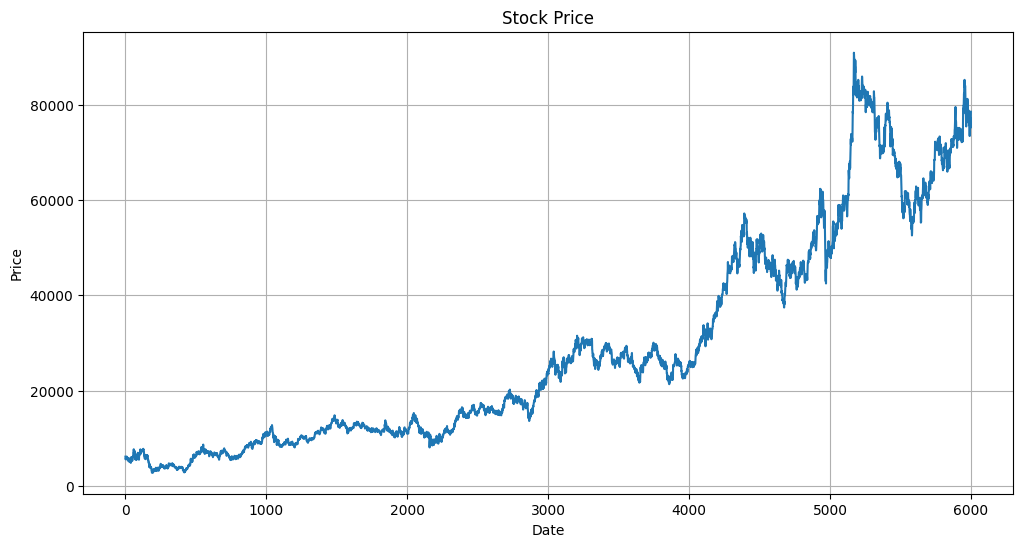

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

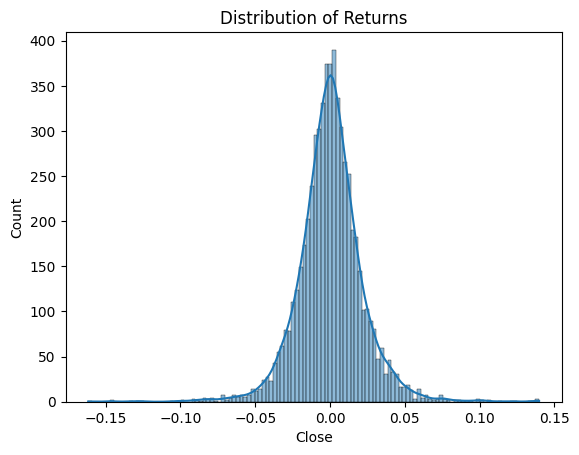

In [16]:
returns = np.log(df['Close'] / df['Close'].shift(1))
returns.dropna(inplace=True)
sns.histplot(returns, kde=True)
plt.title('Distribution of Returns')
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s:%.3f' % (key, value))

ADF Statistic: 0.141791
p-value: 0.968801
Critical Values:
	1%:-3.431
	5%:-2.862
	10%:-2.567


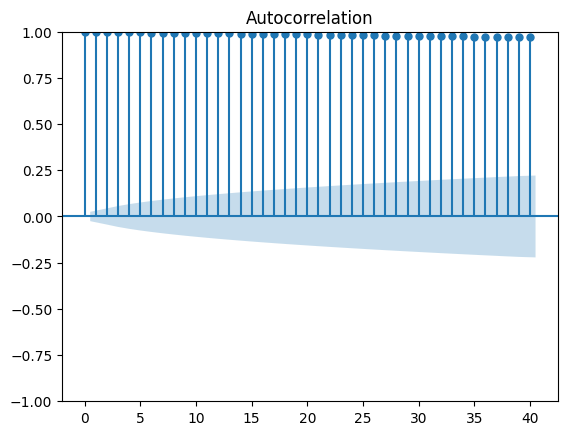

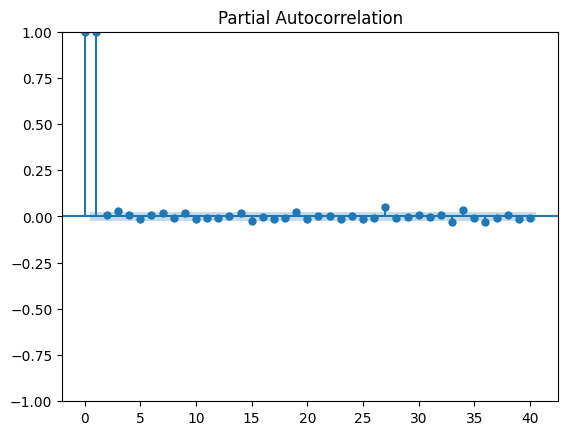

In [20]:
plot_acf(df['Close'], lags=40)
plt.show()
plot_pacf(df['Close'], lags=40)
plt.show()

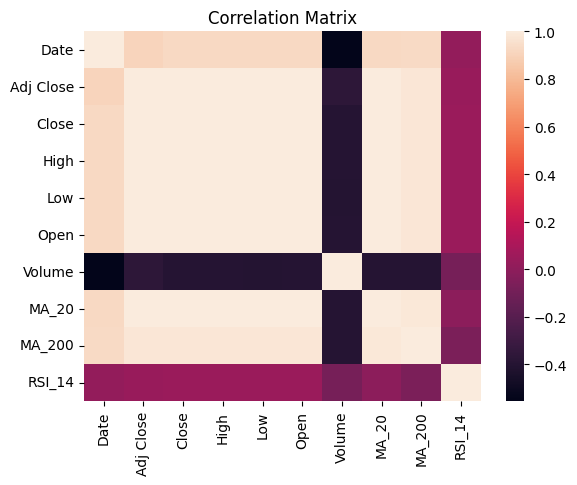

In [21]:
# Calculate Pearson correlation
correlation_matrix = df.corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

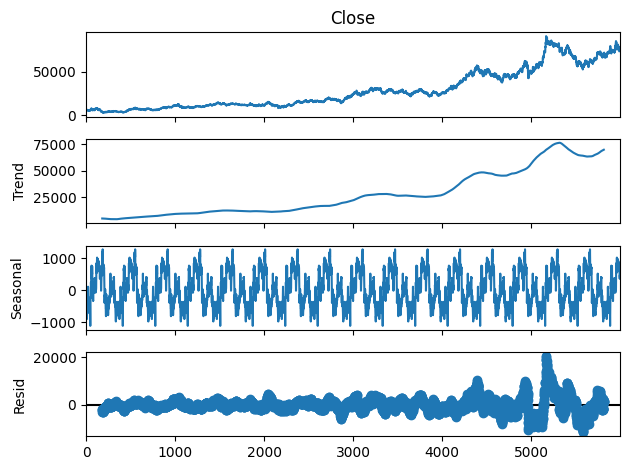

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
decomposition.plot()
plt.show()